In [5]:
# Import all libraries
import os
import numpy as np
import matplotlib
import pylab as plt
import random
import h5py
import stainNorm_Reinhard as stainNorm


In [6]:
#data dirs
data_dir = './data/'
train_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_train_x.h5')
valid_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_valid_x.h5')
test_dir_x = os.path.join(data_dir, 'camelyonpatch_level_2_split_test_x.h5')

dirs = [valid_dir_x, test_dir_x, train_dir_x]
names = ["x_valid", "x_test", "x_train"]

print(train_dir_x)

./data/camelyonpatch_level_2_split_train_x.h5


In [7]:
def getTarget(data_dir):
    with h5py.File(data_dir, 'r') as hdf:
        target = list(hdf['x'][0])
        return np.array(target)/255
    
def getlengths(dirs):
    lengths = []
    shapes = []
    for d in dirs:
        with h5py.File(d, 'r') as hdf:
            lengths.append(len(hdf['x']))
            shapes.append(hdf['x'].shape)
    return np.array(lengths), shapes
        
    
def getData(data_dir, half, length):
    with h5py.File(data_dir, 'r') as hdf:
        data = np.array([])
        if half == 0:
            data = np.array(list(hdf['x'][:int(length/2)]))
        else:
            data = np.array(list(hdf['x'][int(length/2):]))
            
        return data
    
def getDataSample(data_dir, a):
    with h5py.File(data_dir, 'r') as hdf:
        data = []
        for i in a:
            data.append(np.array(list(hdf['x'][i])))
        return np.array(data)
    
class StainNormalizer:
    def __init__(self, target):
        self.target = target
        self.normalizer = stainNorm.Normalizer()
        self.normalizer.fit(self.target)
        
    def normalize(self, data):
        return np.array([self.normalizer.transform(x) for x in data])
    
def normalize_datasets(dirs, names, lengths, shapes, stain_normalizer):
    #create dir if not exists
    saving_dir = './data/normalized/'
    if(not os.path.exists(saving_dir)):
        os.mkdir(saving_dir)
        
    for i in range(len(dirs)):
        #set path
        path = os.path.join(saving_dir, names[i]+".h5")
        #create empty dataset
        h5f = h5py.File(path, 'w')
        h5f.create_dataset("x", shapes[i], dtype='uint8')
        h5f.close()
        #check if it is correct
        with h5py.File(path, 'r') as hdf:
            print("path = {}, length = {}, shape = {}".format(path, len(hdf['x']), hdf['x'].shape))
            
        for j in range(2):
            print("j = {}".format(j))
            #get half of the data
            data = getData(dirs[i],j,lengths[i])
            print("data shape = {}".format(data.shape))
            #nomalize the data
            data = stain_normalizer.normalize(data)
            if j == 0:
                with h5py.File(path, 'a') as hf:
                    hf["x"][:int(lengths[i]/2)] = data
            else:
                with h5py.File(path, 'a') as hf:
                    hf["x"][int(lengths[i]/2):] = data
            
            
            
        

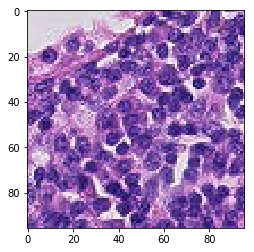

In [8]:
#get variables
lengths, shapes = getlengths(dirs)
target = getTarget(train_dir_x)
plt.imshow(target)
stain_normalizer = StainNormalizer(target)

In [9]:
#normalize datasets
normalize_datasets(dirs, names, lengths, shapes,  stain_normalizer)

path = ./data/normalized/x_valid.h5, length = 32768, shape = (32768, 96, 96, 3)
j = 0
data shape = (16384, 96, 96, 3)
j = 1
data shape = (16384, 96, 96, 3)


D:\Git\Ismi19\stainNorm_Reinhard.py:84: RuntimeWarning: divide by zero encountered in true_divide
  norm2 = ((I2 - means[1]) * (self.target_stds[1] / stds[1])) + self.target_means[1]
D:\Git\Ismi19\stainNorm_Reinhard.py:84: RuntimeWarning: invalid value encountered in multiply
  norm2 = ((I2 - means[1]) * (self.target_stds[1] / stds[1])) + self.target_means[1]
D:\Git\Ismi19\stainNorm_Reinhard.py:85: RuntimeWarning: divide by zero encountered in true_divide
  norm3 = ((I3 - means[2]) * (self.target_stds[2] / stds[2])) + self.target_means[2]
D:\Git\Ismi19\stainNorm_Reinhard.py:85: RuntimeWarning: invalid value encountered in multiply
  norm3 = ((I3 - means[2]) * (self.target_stds[2] / stds[2])) + self.target_means[2]


path = ./data/normalized/x_test.h5, length = 32768, shape = (32768, 96, 96, 3)
j = 0
data shape = (16384, 96, 96, 3)
j = 1
data shape = (16384, 96, 96, 3)
path = ./data/normalized/x_train.h5, length = 262144, shape = (262144, 96, 96, 3)
j = 0
data shape = (131072, 96, 96, 3)


D:\Git\Ismi19\stainNorm_Reinhard.py:83: RuntimeWarning: divide by zero encountered in true_divide
  norm1 = ((I1 - means[0]) * (self.target_stds[0] / stds[0])) + self.target_means[0]
D:\Git\Ismi19\stainNorm_Reinhard.py:83: RuntimeWarning: invalid value encountered in multiply
  norm1 = ((I1 - means[0]) * (self.target_stds[0] / stds[0])) + self.target_means[0]


j = 1
data shape = (131072, 96, 96, 3)


D:\Git\Ismi19\stain_utils.py:124: RuntimeWarning: invalid value encountered in true_divide
  return np.clip(I * 255.0 / p, 0, 255).astype(np.uint8)


In [10]:
#test if it worked valid
a = np.random.randint(16384, size=10)
print(a)
x_norm = getDataSample("./data/normalized/x_valid.h5", a)
x = getDataSample(valid_dir_x, a)

[ 3117  6907  2163 10203  1685   192  1244 10396  5583  4866]


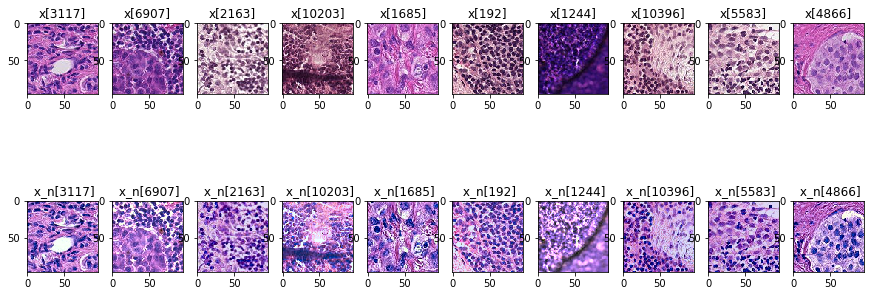

In [11]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [12]:
x_norm = getDataSample("./data/normalized/x_test.h5", a)
x = getDataSample(test_dir_x, a)

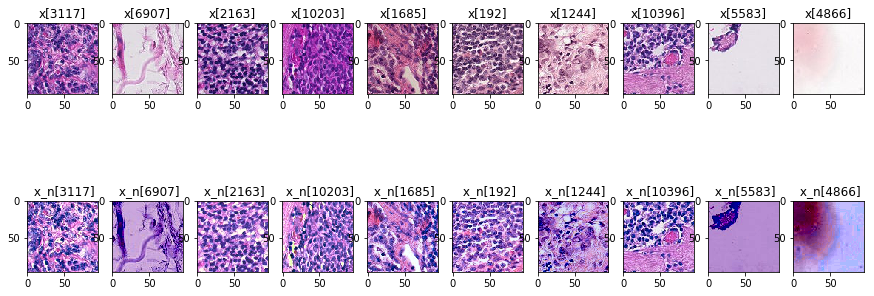

In [13]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [15]:
x_norm = getDataSample("./data/normalized/x_train.h5", a)
x = getDataSample(train_dir_x, a)

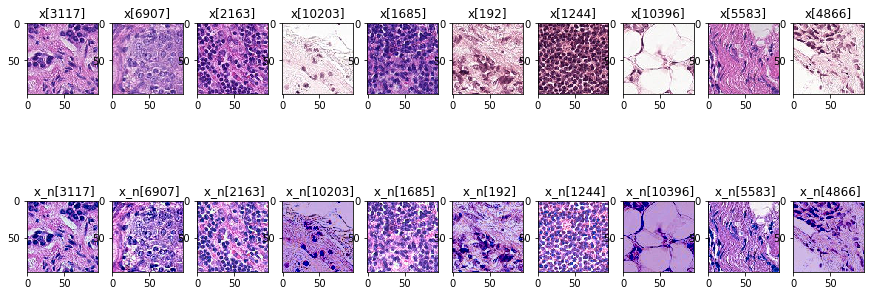

In [16]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])

In [17]:
a = np.random.randint(262144, size=10)
print(a)
x_norm = getDataSample("./data/normalized/x_train.h5", a)
x = getDataSample(train_dir_x, a)

[178907 114802 168722 215628 220049 236963 150402 223520 213992  63207]


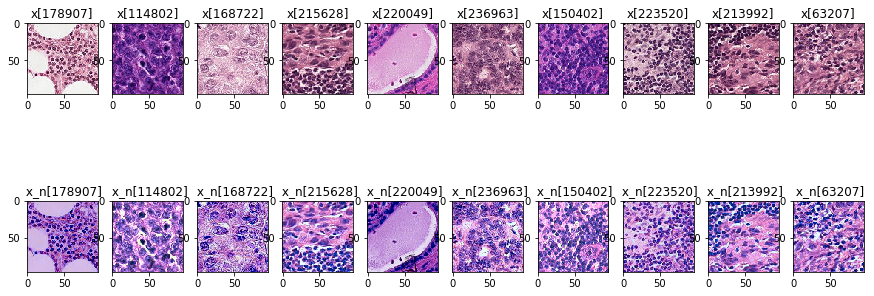

In [18]:
for i in range(10):
    plt.rcParams['figure.figsize'] = (15, 6)
    plt.subplot(2,10,i+1)
    plt.title("x[{}]".format(a[i]))
    plt.imshow(x[i])
    plt.subplot(2,10,10+i+1)
    plt.title(" x_n[{}]".format(a[i]))
    plt.imshow(x_norm[i])